In [ ]:
import pandas as pd

df = pd.read_csv('captions.csv')

In [ ]:
df['caption'][0]

In [ ]:
from transformers import ClapModel, ClapProcessor
import librosa

model = ClapModel.from_pretrained("laion/clap-htsat-unfused")
processor = ClapProcessor.from_pretrained("laion/clap-htsat-unfused")

In [ ]:
audio_path = f'CAP_audio/cap0.wav'
audio_array, sample_rate = librosa.load(audio_path, sr=None)

In [ ]:
audio_inputs = processor(audios=audio_array, return_tensors="pt",sampling_rate=48000)

In [ ]:
audio_embeddings = model.get_audio_features(**audio_inputs)

In [ ]:
df = pd.read_csv('prompts_genres.csv')

In [ ]:
df['prompts'][0]

In [ ]:
df

,CLAP_text + CLAP_audio,CLAP_text + MusicGen_audio,CLAP_text + Riffusion_audio,Genre_text + MusicGen_audio,Genre_text + Riffusion_audio,Mood_text + MusicGen_audio,Mood_text + Riffusion_audio
0,0.672788,0.446639,0.282106,0.573853,0.400649,0.579804,0.216670
1,0.567314,0.597951,0.286143,0.589476,0.322315,0.506795,0.314468
2,0.451123,0.131677,0.147614,0.678791,0.342266,0.646008,-0.051430
3,0.514094,0.510855,0.382387,0.560330,0.392092,0.576349,0.255653
4,0.501692,0.789252,0.547765,0.642082,0.382706,0.672277,0.436722
5,0.446002,0.632271,0.307873,0.463852,0.017634,0.620545,0.174023
6,0.216104,0.425589,0.312536,0.663239,0.372492,0.610101,0.258044
7,0.600162,0.354396,0.388588,0.657560,0.489250,0.547440,0.364202
8,0.677125,0.646934,0.275283,0.403106,0.294111,0.576222,0.424395
9,0.541299,0.326407,0.280282,0.532863,0.290856,0.604059,0.033237


In [ ]:
df = pd.read_csv('evaluation_scores.csv')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

bar_width = 0.2
x = np.arange(len(df.index))

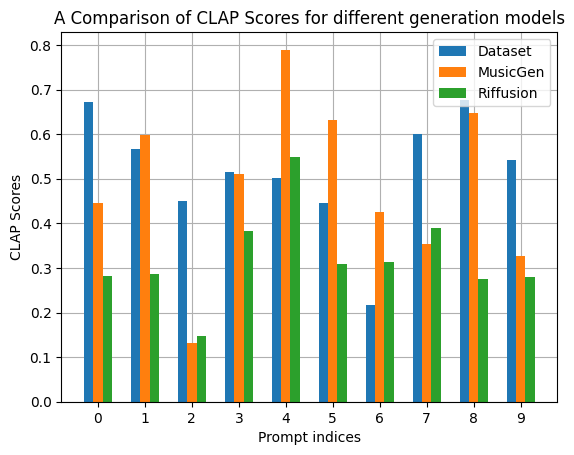

In [ ]:
fig, ax = plt.subplots()

ax.set_axisbelow(True)
ax.grid(True)

ax.bar(x - bar_width, df['CLAP_text + CLAP_audio'], width=bar_width, label='Column1')
ax.bar(x, df['CLAP_text + MusicGen_audio'], width=bar_width, label='Column2')
ax.bar(x + bar_width, df['CLAP_text + Riffusion_audio'], width=bar_width, label='Column3')

# Set the X-axis labels to the index
ax.set_xticks(x)
ax.set_xticklabels(df.index)

# Adding labels and title
ax.set_xlabel('Prompt indices')
ax.set_ylabel('CLAP Scores')
ax.set_title('A Comparison of CLAP Scores for different generation models')

# Adding legend
ax.legend(['Dataset', 'MusicGen', 'Riffusion'])


# Display the plot
plt.show()

# Save the plot

fig.savefig('CLAP_scores_comparison.png')

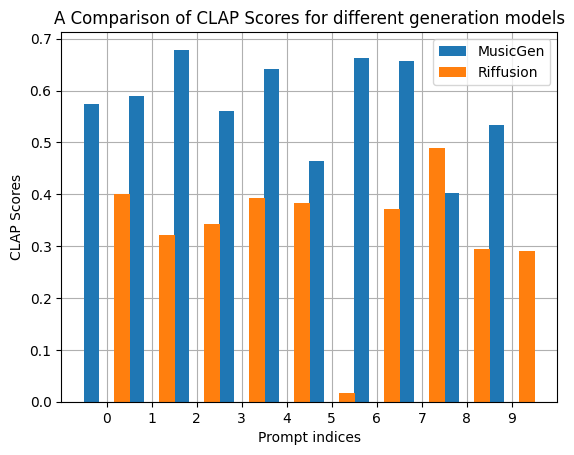

In [ ]:
fig, ax = plt.subplots()

bar_width = 0.34

ax.set_axisbelow(True)
ax.grid(True)

ax.bar(x - bar_width, df['Genre_text + MusicGen_audio'], width=bar_width, label='Column1')
ax.bar(x + bar_width, df['Genre_text + Riffusion_audio'], width=bar_width, label='Column3')

# Set the X-axis labels to the index
ax.set_xticks(x)
ax.set_xticklabels(df.index)

# Adding labels and title
ax.set_xlabel('Prompt indices')
ax.set_ylabel('CLAP Scores')
ax.set_title('A Comparison of CLAP Scores for different generation models')

# Adding legend
ax.legend(['MusicGen', 'Riffusion'])


# Display the plot
plt.show()

# Save the plot

fig.savefig('CLAP_scores_genre_comparison.png')

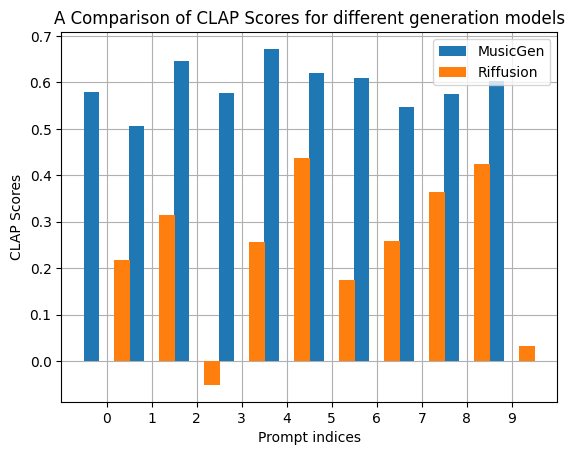

In [ ]:
fig, ax = plt.subplots()

bar_width = 0.34

ax.set_axisbelow(True)
ax.grid(True)

ax.bar(x - bar_width, df['Mood_text + MusicGen_audio'], width=bar_width, label='Column1')
ax.bar(x + bar_width, df['Mood_text + Riffusion_audio'], width=bar_width, label='Column3')

# Set the X-axis labels to the index
ax.set_xticks(x)
ax.set_xticklabels(df.index)

# Adding labels and title
ax.set_xlabel('Prompt indices')
ax.set_ylabel('CLAP Scores')
ax.set_title('A Comparison of CLAP Scores for different generation models')

# Adding legend
ax.legend(['MusicGen', 'Riffusion'])


# Display the plot
plt.show()

# Save the plot

fig.savefig('CLAP_scores_mood_comparison.png')

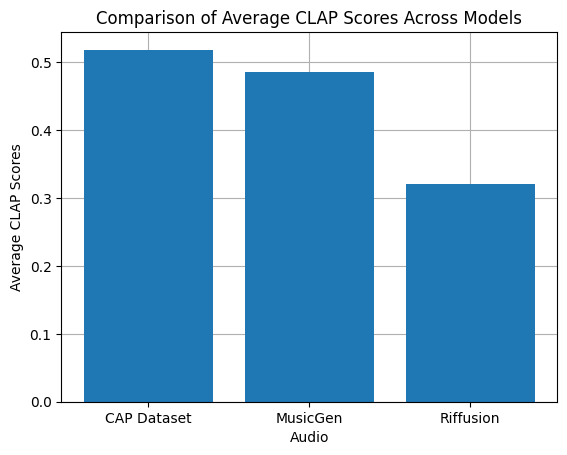

In [ ]:

# Calculate the average of each column
average_values = df[['CLAP_text + CLAP_audio', 'CLAP_text + MusicGen_audio', 'CLAP_text + Riffusion_audio']].mean()

# Plotting the bar plot
fig, ax = plt.subplots()

ax.set_axisbelow(True)
ax.grid(True)



# Plot the averages as bars
ax.bar(average_values.index, average_values.values)

# Set custom labels for the x-axis
custom_labels = ['CAP Dataset', 'MusicGen', 'Riffusion']
ax.set_xticks(range(len(custom_labels)))  # Set x-axis positions
ax.set_xticklabels(custom_labels)  # Apply custom labels

# Set labels and title
ax.set_xlabel('Audio')
ax.set_ylabel('Average CLAP Scores')
ax.set_title('Comparison of Average CLAP Scores Across Models')

# Display the plot
plt.show()

# Save the plot
fig.savefig('Average_CLAP_scores_comparison.png')


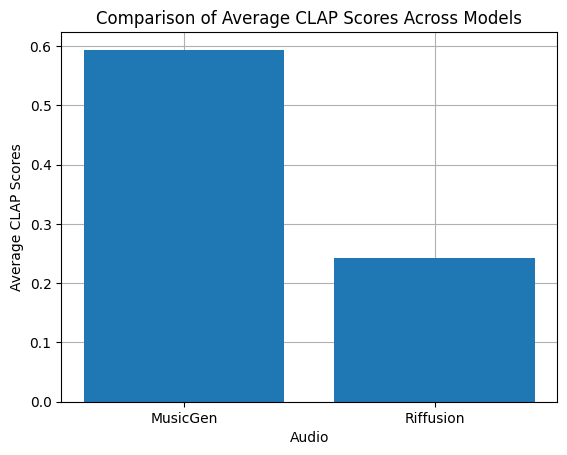

In [ ]:
### Genre Comparison


# Calculate the average of each column
average_values = df[['Mood_text + MusicGen_audio','Mood_text + Riffusion_audio']].mean()

# Plotting the bar plot
fig, ax = plt.subplots()

ax.set_axisbelow(True)
ax.grid(True)



# Plot the averages as bars
ax.bar(average_values.index, average_values.values)

# Set custom labels for the x-axis
custom_labels = ['MusicGen', 'Riffusion']
ax.set_xticks(range(len(custom_labels)))  # Set x-axis positions
ax.set_xticklabels(custom_labels)  # Apply custom labels

# Set labels and title
ax.set_xlabel('Audio')
ax.set_ylabel('Average CLAP Scores')
ax.set_title('Comparison of Average CLAP Scores Across Models')

# Display the plot
plt.show()

# Save the plot
fig.savefig('Average_Mood_scores_comparison.png')


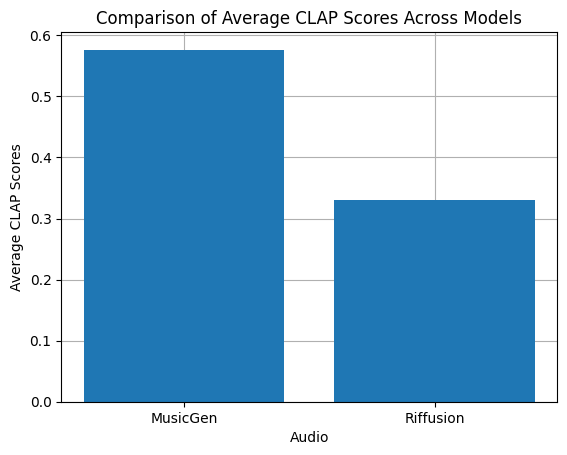

In [ ]:
### Genre Comparison


# Calculate the average of each column
average_values = df[['Genre_text + MusicGen_audio','Genre_text + Riffusion_audio']].mean()

# Plotting the bar plot
fig, ax = plt.subplots()

ax.set_axisbelow(True)
ax.grid(True)



# Plot the averages as bars
ax.bar(average_values.index, average_values.values)

# Set custom labels for the x-axis
custom_labels = ['MusicGen', 'Riffusion']
ax.set_xticks(range(len(custom_labels)))  # Set x-axis positions
ax.set_xticklabels(custom_labels)  # Apply custom labels

# Set labels and title
ax.set_xlabel('Audio')
ax.set_ylabel('Average CLAP Scores')
ax.set_title('Comparison of Average CLAP Scores Across Models')

# Display the plot
plt.show()

# Save the plot
fig.savefig('Average_Genre_scores_comparison.png')